In [2]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference.ExactInference import VariableElimination, DiscreteFactor

import networkx as nx

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.3500 |
+------+----------+
| B(1) |   0.4167 |
+------+----------+
| B(2) |   0.2333 |
+------+----------+
Probability of drawing RED ball: 0.3500


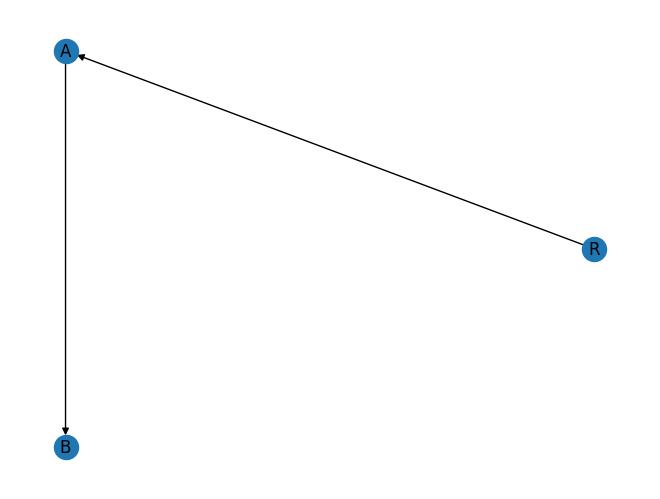

In [3]:
model = DiscreteBayesianNetwork([
    ('R', 'A'),
    ('A', 'B')
])

# Roll die operation. Each face has a 1/6 probability.
cpd_R = TabularCPD(
    variable='R',
    variable_card=6,
    values=[
        [1/6],[1/6],[1/6],[1/6],[1/6],[1/6]
    ]
)

# Add operation Ball adding given the die roll D.
cpd_A = TabularCPD(
    variable='A',
    variable_card=3,
    values=[
        [0, 1, 1, 0, 1, 0], # If given number is prime.
        [0, 0, 0, 0, 0, 1], # If given number is 6.
        [1, 0, 0, 1, 0, 0]],
    evidence=['R'], evidence_card=[6])

# Draw operation.
cpd_B = TabularCPD(
    variable='B', variable_card=3,values=[
        [4/10, 3/10, 3/10],  # P(B=red | A) - after adding red/blue/black
        [4/10, 5/10, 4/10],  # P(B=blue | A)
        [2/10, 2/10, 3/10]   # P(B=black | A)
    ],
    evidence=['A'],
    evidence_card=[3]
)

model.add_cpds(cpd_R, cpd_A, cpd_B)
assert model.check_model()

infer = VariableElimination(model)
result = infer.query(['B'])

print(result)
assert isinstance(result, DiscreteFactor)
print(f"Probability of drawing RED ball: {result.values[0]:.4f}")

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos)